# Lab II - Clustering

## Machine Learning II

Eileen Melissa Arevalo Garnica

In [1]:
from unsupervised.Clusters.kmeans import KMeans
from unsupervised.Clusters.kmedoids import KMedoids
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

1. Research about the Spectral Clustering method, and answer the following questions:

a. In which cases might it be more useful to apply?
b. What are the mathematical fundamentals of it?
c. What is the algorithm to compute it?
d. Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?

R/ 
a. Spectral clustering has its application in many areas which includes: image segmentation, educational data mining, entity resolution, speech separation, spectral clustering of protein sequences, text image segmentation.

b.Spectral grouping has its mathematical foundations in linear algebra, it makes use of the similarity matrix to perform a dimensionality reduction; of the eigenvectors and eigenvalues to protect the data in a space where the groups can be separated more easily; graphs and matrices that indicate the connections between nodes and are used to capture the similarity structure between data samples; Clustering algorithms such as k-means are also applied to divide the data into coherent groups.

c.

![alt text](image.png)

d. It is related to the topics of eigenvectors and eigenvectors, with dimensionality reduction, with techniques such as SVD and PCA and also with the grouping of data through k means.

2. Research about the DBSCAN method, and answer the following questions:
a. In which cases might it be more useful to apply?
b. What are the mathematical fundamentals of it?
c. Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?


a. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density based clustering algorithm, it does a great job of seeking areas in the data that have a high density of observations, versus areas of the data that are not very dense with observations. DBSCAN can sort data into clusters of varying shapes as well, another strong advantage

b. DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

DBSCAN creates a circle of epsilon radius around every data point and classifies them into Core point, Border point, and Noise. A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points. If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise.

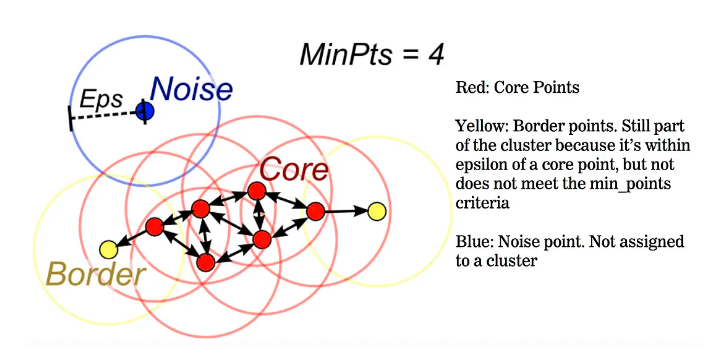

For locating data points in space, DBSCAN uses Euclidean distance, although other methods can also be used (like great circle distance for geographical data). It also needs to scan through the entire dataset once, whereas in other algorithms we have to do it multiple times.

3. What is the elbow method in clustering? And which flaws does it pose to assess quality?

The Elbow Method is a technique used to determine the optimal number of clusters in a clustering algorithm, such as k-means. SSE (sum of the squared distance of each of the observations to its centroid) within the cluster. The SSE measures distortion, and allows the performance of different k-means clusters to be compared.

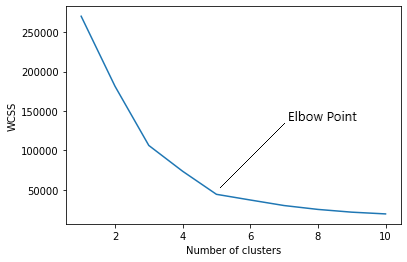

Limitations and potential flaws:

Sensitivity to Data Set: In some cases, it may be difficult to clearly identify the turning point on the graph.

Dependency of the Clustering Algorithm:

The elbow method is specific to the clustering algorithm used. It works well with k-means because it minimizes the sum of squares of intra-cluster distances, but may not be appropriate for other clustering algorithms that optimize different criteria.

Inability to Handle Non-Convex Structures:

If the data set contains non-convex structures or irregularly shaped clusters, the elbow method may not provide a clear indication of the optimal number of clusters. It can identify an elbow even when the actual number of clusters is different.

5. Let’s use the newly created modules in unsupervised to cluster some toy data.

In [2]:
X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

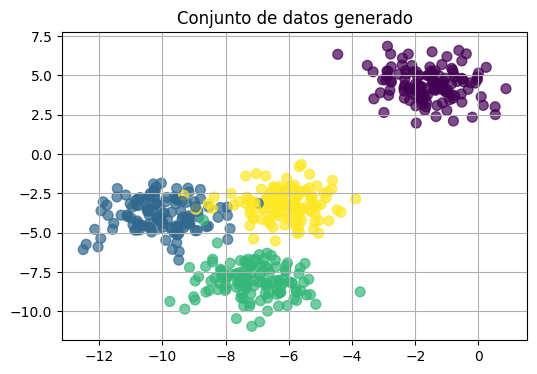

In [3]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title('Conjunto de datos generado')
plt.grid(True)
plt.show()

In [4]:
# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=4)

# Fit KMeans to the data
kmeans.fit(X)

# Get centroids and cluster labels
centroids = kmeans.centroids
labels = kmeans.labels

# Calculate pairwise distances between centroids
distances = np.linalg.norm(centroids[:, np.newaxis] - centroids, axis=2)

# Print the number of clusters
num_clusters = len(np.unique(labels))
print(f'Number of clusters: {num_clusters}')

# Print pairwise distances between centroids
print('Distances between centroids:')
for i in range(len(centroids)):
    for j in range(i+1, len(centroids)):
        print(f'Distance between centroid {i+1} and centroid {j+1}: {(distances[i][j].round(2))}')

Number of clusters: 4
Distances between centroids:
Distance between centroid 1 and centroid 2: 5.16
Distance between centroid 1 and centroid 3: 5.04
Distance between centroid 1 and centroid 4: 13.72
Distance between centroid 2 and centroid 3: 3.98
Distance between centroid 2 and centroid 4: 11.85
Distance between centroid 3 and centroid 4: 8.86


6. Use the following code snippet to create different types of scattered data:

In [5]:

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

C:\Users\DO IT WISER\AppData\Local\Temp\ipykernel_5436\2236086932.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X[:, 0], X[:, 1], s=10, c=color_map, cmap='viridis')  # Utiliza la paleta de colores 'viridis'
C:\Users\DO IT WISER\AppData\Local\Temp\ipykernel_5436\2236086932.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], s=10, c=color_map, cmap='viridis')  # Utiliza la paleta de colores 'viridis'


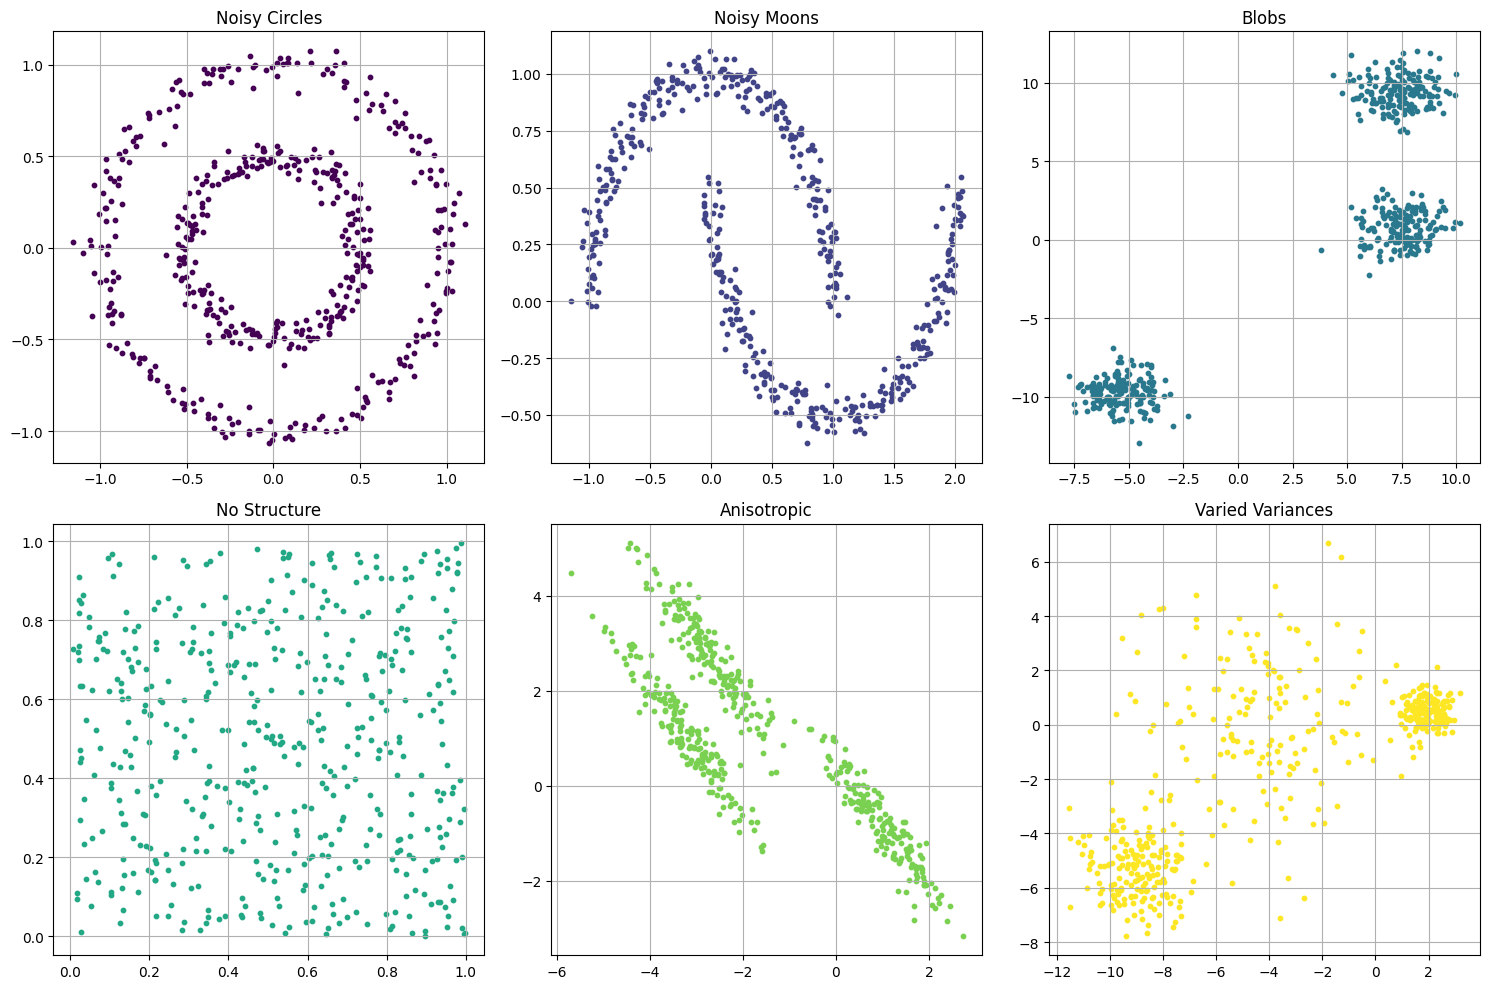

In [6]:
# Define a function to plot the datasets
def plot_dataset(ax, X, title, color_map):
    ax.scatter(X[:, 0], X[:, 1], s=10, c=color_map, cmap='viridis')  # Utiliza la paleta de colores 'viridis'
    ax.set_title(title)
    ax.grid(True)

# Plot each dataset
datasets = [
    ("Noisy Circles", noisy_circles[0]),
    ("Noisy Moons", noisy_moons[0]),
    ("Blobs", blobs[0]),
    ("No Structure", no_structure[0]),
    ("Anisotropic", aniso[0]),
    ("Varied Variances", varied[0])
]

colors = cm.viridis(np.linspace(0, 1, len(datasets)))  # Genera una lista de colores basada en la paleta 'viridis'

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Crea una figura con 3 columnas y 2 filas

for ax, (name, data), color in zip(axes.flatten(), datasets, colors):
    plot_dataset(ax, data, name, color)

plt.tight_layout()  # Ajusta automáticamente el diseño para evitar superposiciones
plt.show()




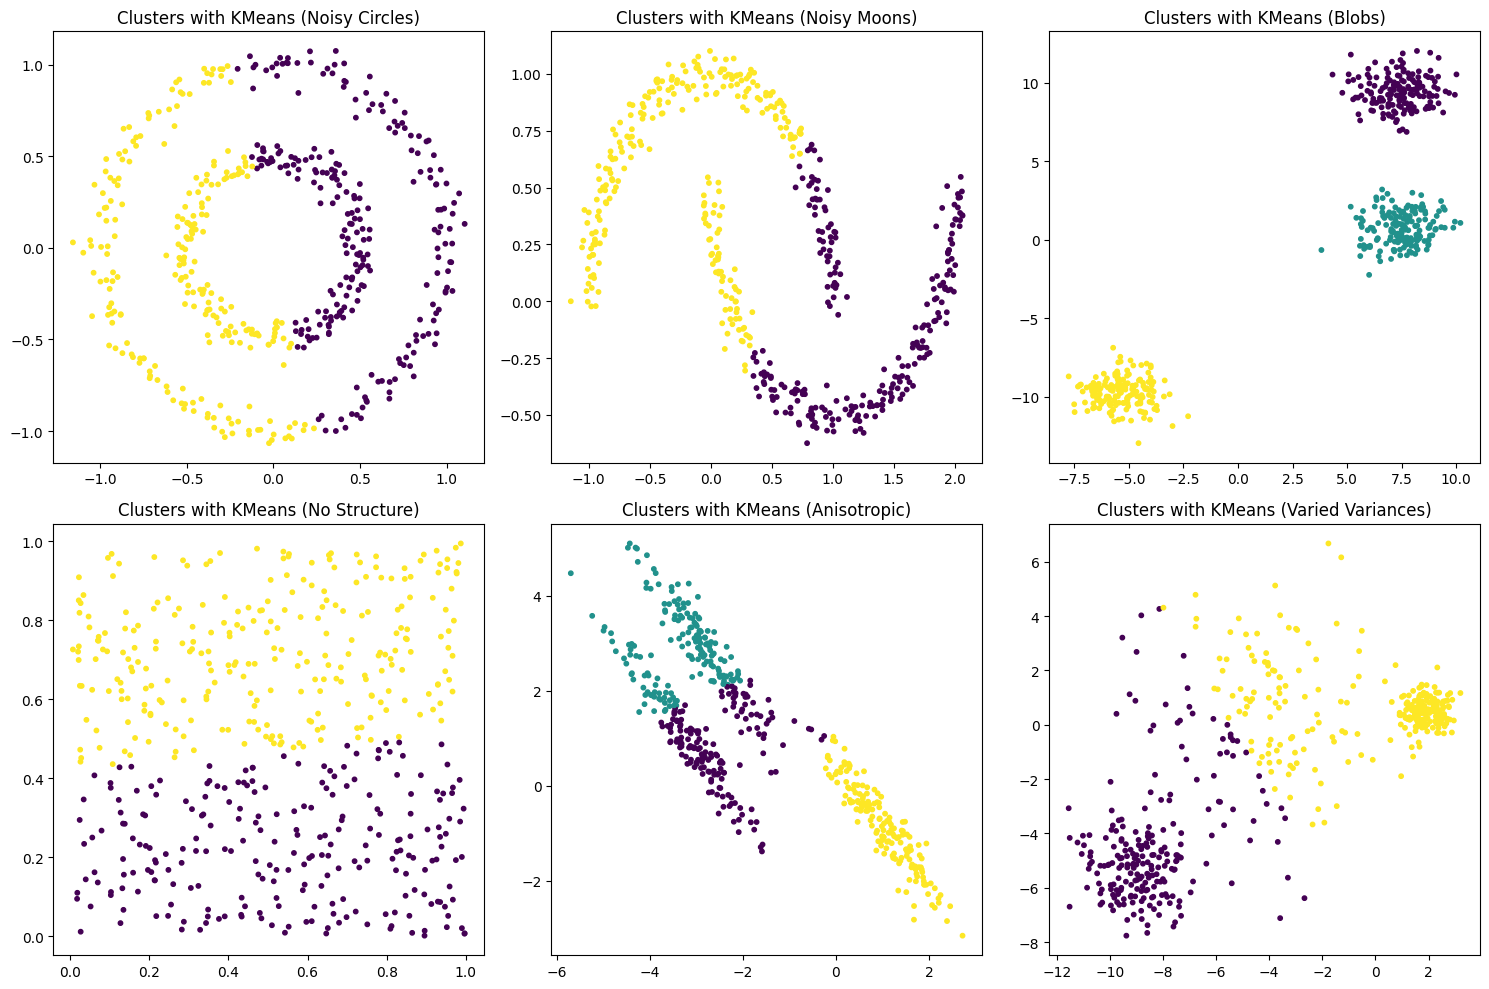

In [7]:
# Define a function to apply KMeans clustering and visualize the results
def visualize_kmeans(ax, kmeans_instance, X, title):
    # Fit the model to the data
    kmeans_instance.fit(X)
    
    # Get the cluster labels
    labels = kmeans_instance.labels
    
    # Visualize the results
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    ax.set_title(f'Clusters with KMeans ({title})')

# Define the datasets
datasets = [
    ("Noisy Circles", noisy_circles[0]),
    ("Noisy Moons", noisy_moons[0]),
    ("Blobs", blobs[0]),
    ("No Structure", no_structure[0]),
    ("Anisotropic", aniso[0]),
    ("Varied Variances", varied[0])
]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Apply KMeans and visualize the results for each dataset
for (name, data), ax in zip(datasets, axes.flatten()):
    if name in ["Blobs", "Anisotropic"]:
        kmeans_instance = KMeans(n_clusters=3)
    else:
        kmeans_instance = KMeans(n_clusters=2)
    visualize_kmeans(ax, kmeans_instance, data, name)

plt.tight_layout()
plt.show()




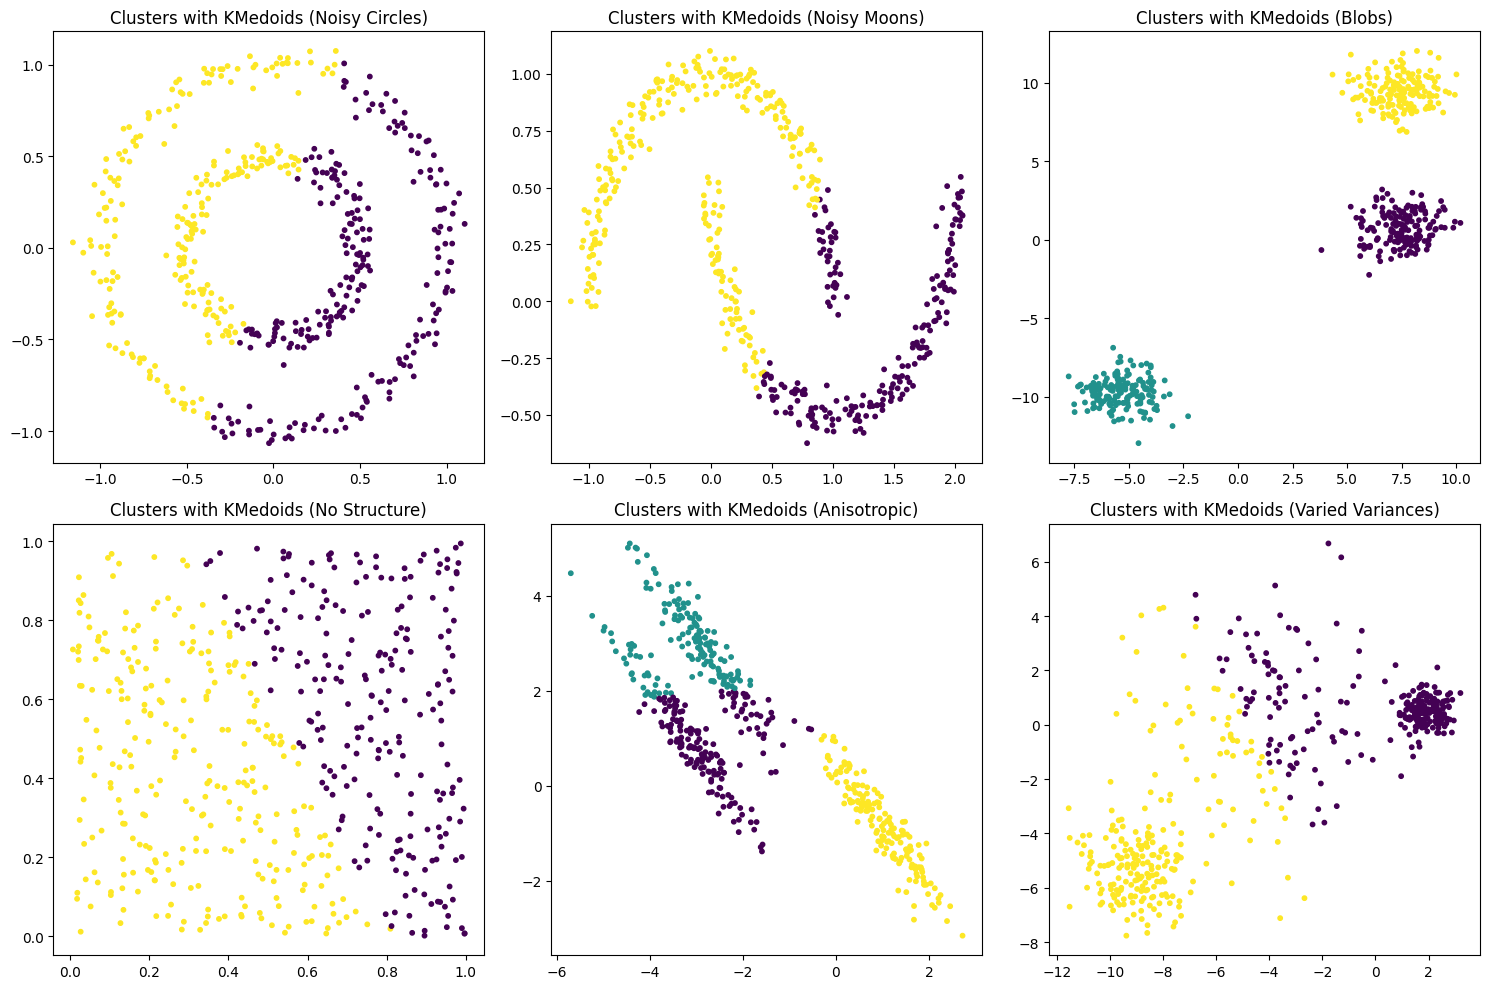

In [8]:
def visualize_kmedoids(ax, kmedoids_instance, X, title):
    # Fit the model to the data
    kmedoids_instance.fit(X)
    
    # Get the cluster labels
    labels = kmedoids_instance.labels_
    
    # Visualize the results
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    ax.set_title(f'Clusters with KMedoids ({title})')

# Define the datasets
datasets = [
    ("Noisy Circles", noisy_circles[0]),
    ("Noisy Moons", noisy_moons[0]),
    ("Blobs", blobs[0]),
    ("No Structure", no_structure[0]),
    ("Anisotropic", aniso[0]),
    ("Varied Variances", varied[0])
]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Apply KMedoids and visualize the results for each dataset
for (name, data), ax in zip(datasets, axes.flatten()):
    if name in ["Blobs", "Anisotropic"]:
        kmedoids_instance = KMedoids(n_clusters=3)
    else:
        kmedoids_instance = KMedoids(n_clusters=2)
    visualize_kmedoids(ax, kmedoids_instance, data, name)

plt.tight_layout()
plt.show()


c:\Users\DO IT WISER\Documents\Personal\machine_learning2\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\DO IT WISER\Documents\Personal\machine_learning2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\DO IT WISER\Documents\Personal\machine_learning2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\DO IT WISER\Documents\Personal\machine_learning2\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserW

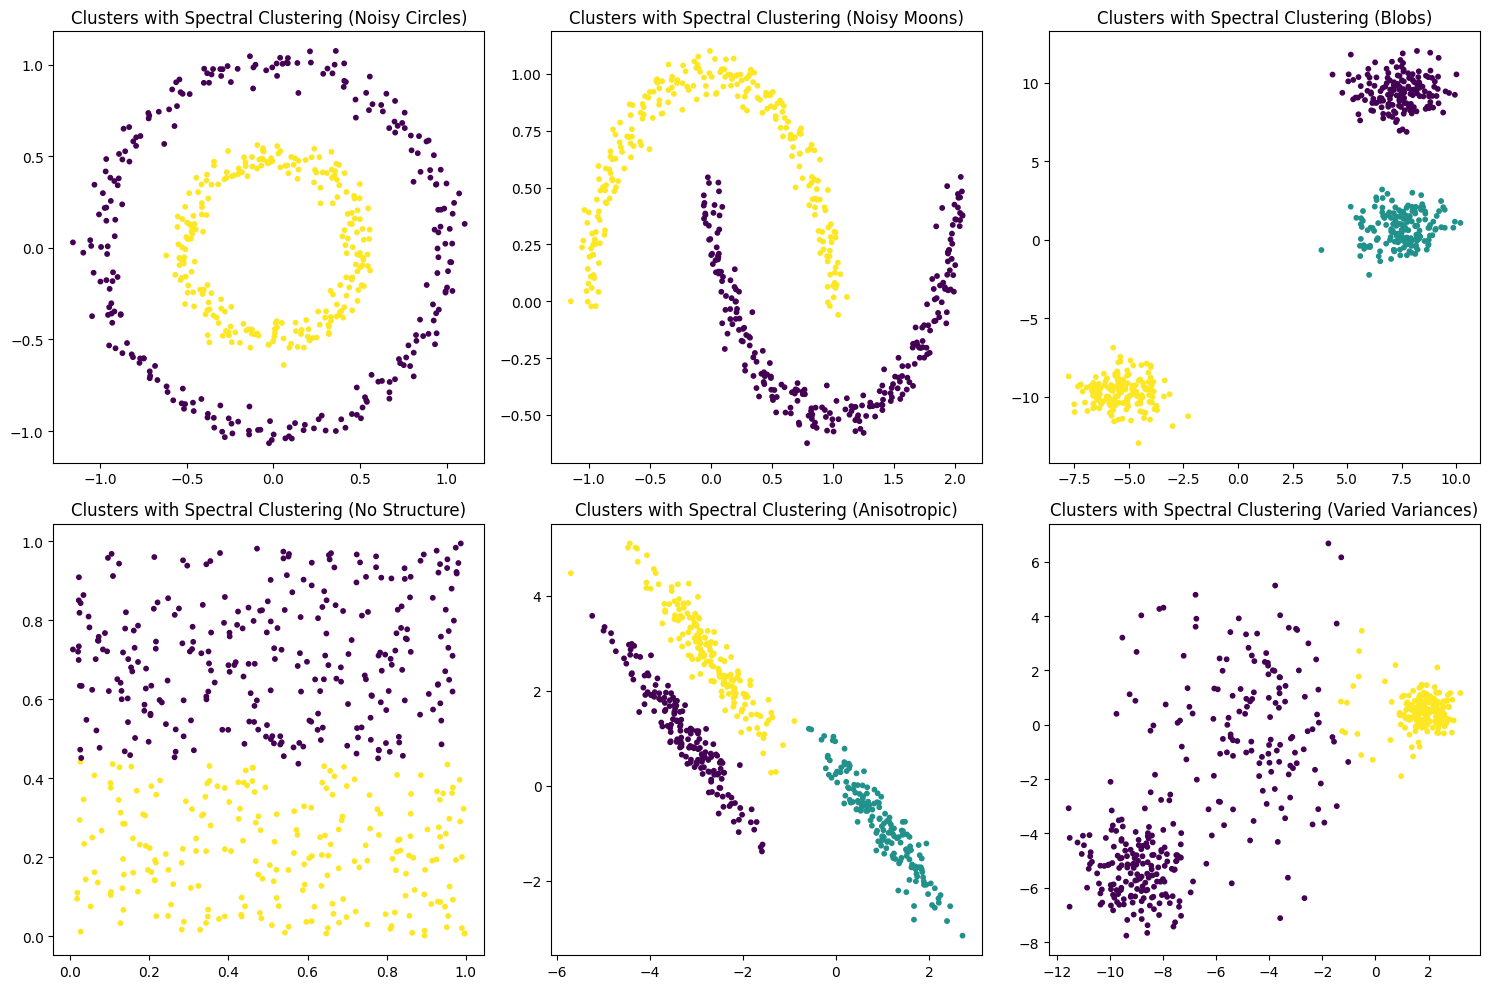

In [9]:


# Define a function to apply Spectral Clustering and visualize the results
def visualize_spectral_clustering(ax, spectral_instance, X, title):
    # Fit the model to the data
    spectral_instance.fit(X)
    
    # Get the cluster labels
    labels = spectral_instance.labels_
    
    # Visualize the results
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    ax.set_title(f'Clusters with Spectral Clustering ({title})')


# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Apply Spectral Clustering and visualize the results for each dataset
for (name, data), ax in zip(datasets, axes.flatten()):
    if name in ["Blobs", "Anisotropic"]:
        spectral_instance = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
    else:
        spectral_instance = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
    visualize_spectral_clustering(ax, spectral_instance, data, name)

plt.tight_layout()
plt.show()

c:\Users\DO IT WISER\Documents\Personal\machine_learning2\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\DO IT WISER\Documents\Personal\machine_learning2\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\DO IT WISER\Documents\Personal\machine_learning2\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


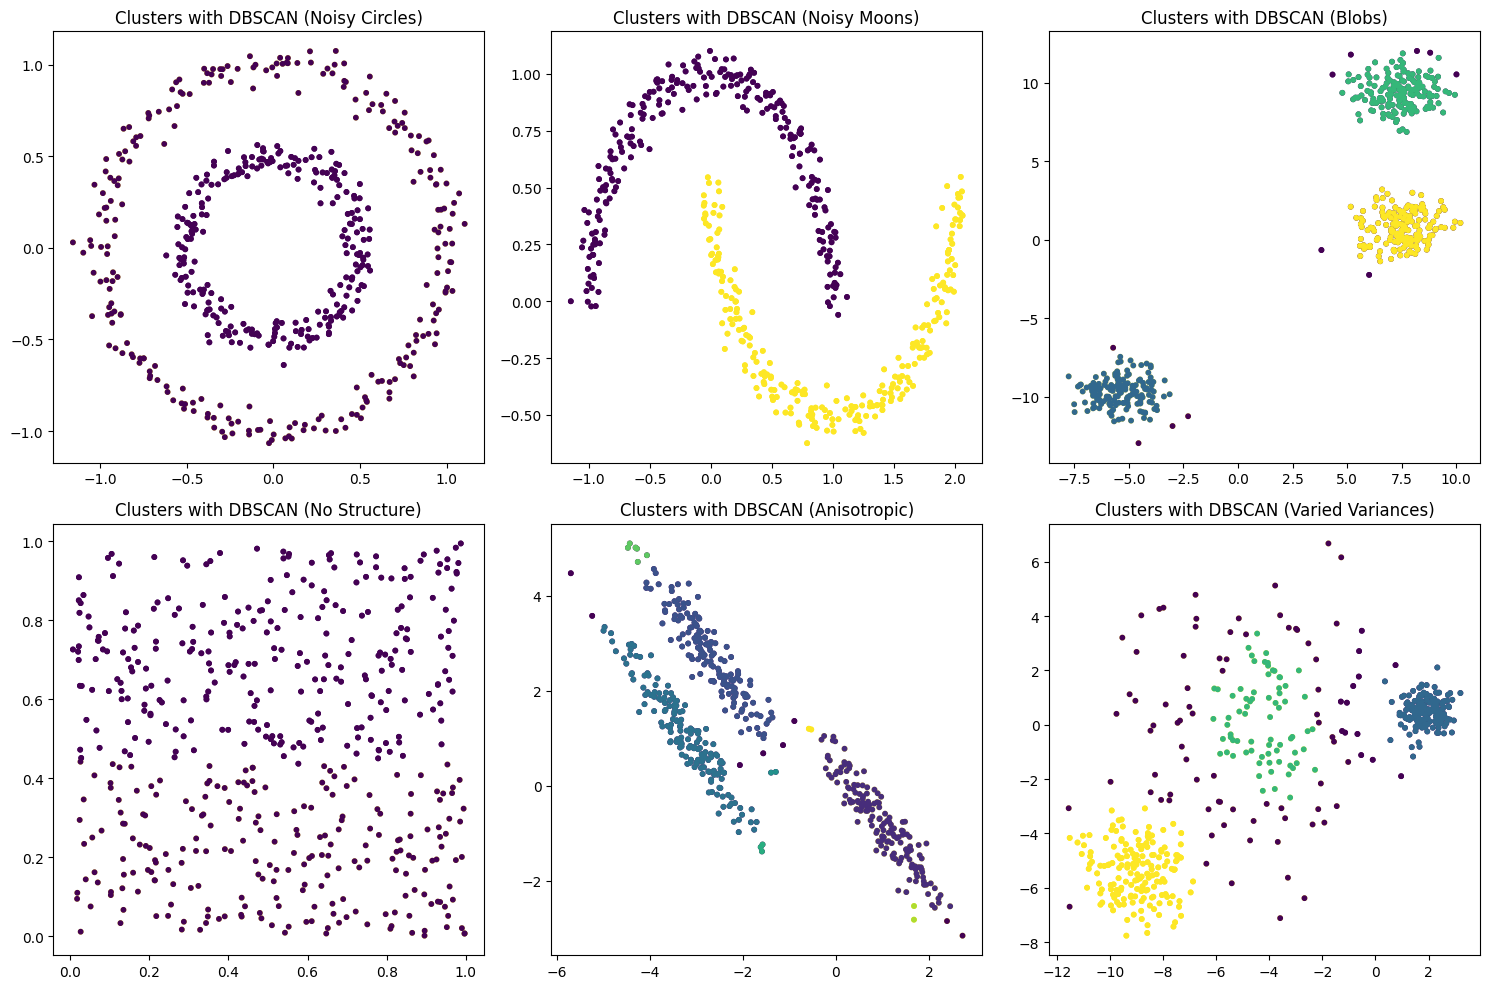

In [12]:
# Define a function to apply DBSCAN clustering and visualize the results
def visualize_dbscan(ax, dbscan_instance, X, title):
    # Fit the model to the data
    dbscan_instance.fit(X)
    
    # Get the cluster labels
    labels = dbscan_instance.labels_
    
    # Visualize the results
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    ax.set_title(f'Clusters with DBSCAN ({title})')

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Apply DBSCAN and visualize the results for each dataset
for (name, data), ax in zip(datasets, axes.flatten()):
    if name in ["Blobs", "Varied Variances"]:
            visualize_spectral_clustering(ax, spectral_instance, data, name)    
            dbscan_instance = DBSCAN(eps=0.9, min_samples=10)
            visualize_dbscan(ax, dbscan_instance, data, name)
    else:
        visualize_spectral_clustering(ax, spectral_instance, data, name)    
        dbscan_instance = DBSCAN(eps=0.3, min_samples=2)
        visualize_dbscan(ax, dbscan_instance, data, name)


    
plt.tight_layout()
plt.show()